In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pow,exp
from sklearn.linear_model import LinearRegression
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('elantra.csv')

In [3]:
df.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,1,2011,9659,9.1,259,229.353,221.082
2,1,2012,10900,8.2,354,244.178,227.666
3,1,2013,12174,7.9,230,242.560,231.321
4,1,2014,15326,6.6,232,247.575,234.933


In [4]:
df.describe()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.300000,2011.600000,16005.440000,8.422000,263.480000,236.945280,226.739040
std,3.558548,1.212183,4887.924676,0.951538,77.982007,15.393399,5.942194
min,1.000000,2010.000000,7690.000000,6.600000,130.000000,204.161000,217.251000
25%,3.000000,2011.000000,12560.500000,7.725000,224.750000,230.061750,221.265500
50%,6.000000,2012.000000,15624.500000,8.250000,262.500000,244.388000,227.902000
75%,9.000000,2013.000000,19197.250000,9.100000,311.000000,247.061750,231.693250
max,12.000000,2014.000000,26153.000000,9.900000,427.000000,256.389000,235.169000


In [5]:
df.columns

Index([u'Month', u'Year', u'ElantraSales', u'Unemployment', u'Queries',
       u'CPI_energy', u'CPI_all'],
      dtype='object')

**Problem 1 - Loading the Data**

0 points possible (ungraded)
 Unit 9: Integer
Optimization
 Final Exam
Load the data set. Split the data set into training and testing sets as
follows: place all observations for 2012 and earlier in the training set,
and all observations for 2013 and 2014 into the testing set.
How many observations are in the training set?

In [6]:
df_train=df[df.Year<=2012]
df_test = df[df.Year>2012]

In [7]:
df_train.shape[0]

36

**Problem 2.1 - A Linear Regression Model**

0 points possible (ungraded)

Build a linear regression model to predict monthly Elantra sales using
Unemployment, CPI_all, CPI_energy and Queries as the independent
variables. Use all of the training set data to do this.
What is the model R-squared? Note: In this problem, we will always be
asking for the "Multiple R-Squared" of the model.

In [8]:
'+'.join(df.columns)

'Month+Year+ElantraSales+Unemployment+Queries+CPI_energy+CPI_all'

In [9]:
model = smf.ols('ElantraSales ~ Unemployment+Queries+CPI_energy+CPI_all',data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     5.803
Date:                Sun, 19 Feb 2017   Prob (F-statistic):            0.00132
Time:                        10:44:50   Log-Likelihood:                -339.99
No. Observations:                  36   AIC:                             690.0
Df Residuals:                      31   BIC:                             697.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     9.539e+04   1.71e+05      0.559      0.580     -2.53e+05  4.43e+05
Unemployment -3179.8996   3610.262     -0.881      0.385     -1.05e+04  4183.279
Queries         19.0297     11.259      1.690      0.101        -3.933    41.992
CPI_energy      38.5060    109.601      0.351      0.728      -185.027   262.039
CPI_all       -297.6456    704.837     -0.422      0.676     -1735.169  1139.878
==============================================================================
Omnibus:                        1.210   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.947
Skew:                           0.390   Prob(JB):                        0.623
Kurtosis:                       2.845   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** Problem 3.1 - Modeling Seasonality**

0 points possible (ungraded)

Our model R-Squared is relatively low, so we would now like to improve
our model. In modeling demand and sales, it is often useful to model
seasonality. Seasonality refers to the fact that demand is often
cyclical/periodic in time. For example, in countries with different
seasons, demand for warm outerwear (like jackets and coats) is higher in
fall/autumn and winter (due to the colder weather) than in spring and
summer. (In contrast, demand for swimsuits and sunscreen is higher in
the summer than in the other seasons.) Another example is the "back to
school" period in North America: demand for stationary (pencils,
notebooks and so on) in late July and all of August is higher than the rest
of the year due to the start of the school year in September.
In our problem, since our data includes the month of the year in which
the units were sold, it is feasible for us to incorporate monthly
seasonality. From a modeling point of view, it may be reasonable that
the month plays an effect in how many Elantra units are sold.
To incorporate the seasonal effect due to the month, build a new linear
regression model that predicts monthly Elantra sales using Month as
well as Unemployment, CPI_all, CPI_energy and Queries. Do not modify
the training and testing data frames before building the model.
What is the model R-Squared?

In [10]:
model = smf.ols('ElantraSales ~ Month+Unemployment+Queries+CPI_energy+CPI_all',data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     4.609
Date:                Sun, 19 Feb 2017   Prob (F-statistic):            0.00308
Time:                        10:44:50   Log-Likelihood:                -339.79
No. Observations:                  36   AIC:                             691.6
Df Residuals:                      30   BIC:                             701.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.483e+05   1.95e+05      0.759      0.454     -2.51e+05  5.47e+05
Month          110.6853    191.657      0.578      0.568      -280.731   502.102
Unemployment -4137.2826   4008.558     -1.032      0.310     -1.23e+04  4049.285
Queries         21.1855     11.978      1.769      0.087        -3.278    45.649
CPI_energy      54.1833    114.076      0.475      0.638      -178.790   287.157
CPI_all       -517.9910    808.259     -0.641      0.526     -2168.676  1132.694
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.312
Skew:                           0.453   Prob(JB):                        0.519
Kurtosis:                       2.764   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df_train['ElantraSales_1']=df_train.ElantraSales.shift(-1)
df_train['ElantraSales_2']=df_train.ElantraSales.shift(-2)
df_train['rolling_ElantraSales']=df_train.ElantraSales.ewm(span=10).mean()

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

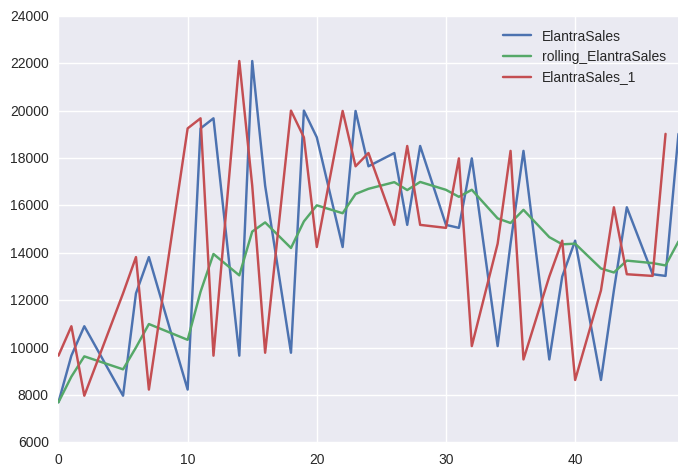

In [12]:
df_train[['ElantraSales','rolling_ElantraSales','ElantraSales_1']].plot()

In [13]:
model = smf.ols('ElantraSales ~  Month +Unemployment+Queries+CPI_energy+CPI_all',data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     4.609
Date:                Sun, 19 Feb 2017   Prob (F-statistic):            0.00308
Time:                        10:44:50   Log-Likelihood:                -339.79
No. Observations:                  36   AIC:                             691.6
Df Residuals:                      30   BIC:                             701.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     1.483e+05   1.95e+05      0.759      0.454     -2.51e+05  5.47e+05
Month          110.6853    191.657      0.578      0.568      -280.731   502.102
Unemployment -4137.2826   4008.558     -1.032      0.310     -1.23e+04  4049.285
Queries         21.1855     11.978      1.769      0.087        -3.278    45.649
CPI_energy      54.1833    114.076      0.475      0.638      -178.790   287.157
CPI_all       -517.9910    808.259     -0.641      0.526     -2168.676  1132.694
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.312
Skew:                           0.453   Prob(JB):                        0.519
Kurtosis:                       2.764   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Problem 3.3 - Understanding the Model**


Let us try to understand our model.
In the new model, given two monthly periods that are otherwise
identical in Unemployment, CPI_all, CPI_energy and Queries, what is the
absolute difference in predicted Elantra sales given that one period is in
January and one is in March?

In [14]:
print result.params.Month*2
print result.params.Month*4


221.370539303
442.741078605


**Problem 3.4 - Numeric vs. Factors**


You may be experiencing an uneasy feeling that there is something not
quite right in how we have modeled the effect of the calendar month on
the monthly sales of Elantras. If so, you are right. In particular, we added Month as a variable, but Month is an ordinary numeric variable. In fact,
we must convert Month to a factor variable before adding it to the
model.
What is the best explanation for why we must do this?

In [15]:
## Not used, because Statsmodel handle the 'category' formt of pandas very well.
def relevel_month(df):
    dummies = pd.get_dummies(df.Month,prefix='Month')

    df = pd.concat([df, dummies], axis=1)
    df = df.drop(['Month', 'Month_1'], axis=1)
    return df

In [16]:
df_train_leveled = relevel_month(df_train)
df_test_leveled = relevel_month(df_test)

In [17]:
df_train['category_month'] =  df_train['Month'].astype('category')

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
df_train.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all,ElantraSales_1,ElantraSales_2,rolling_ElantraSales,category_month
0,1,2010,7690,9.7,153,213.377,217.466,9659.0,10900.0,7690.000000,1
1,1,2011,9659,9.1,259,229.353,221.082,10900.0,7966.0,8772.950000,1
2,1,2012,10900,8.2,354,244.178,227.666,7966.0,12289.0,9628.009967,1
5,2,2010,7966,9.8,130,209.924,217.251,12289.0,13820.0,9080.451733,2
6,2,2011,12289,9.0,266,232.188,221.816,13820.0,8225.0,10001.538676,2


**Problem 4.1 - A New Model**
Re-run the regression with the Month variable modeled as a factor
variable. (Create a new variable that models the Month as a factor (using
the as.factor function) instead of overwriting the current Month variable.
We'll still use the numeric version of Month later in the problem.)
What is the model R-Squared?

In [19]:
[month for month in df_train_leveled.columns if 'Month_' in month]

['Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12']

In [20]:
model = smf.ols('ElantraSales ~  category_month +Unemployment+Queries+CPI_energy+CPI_all',data=df_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ElantraSales   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     6.044
Date:                Sun, 19 Feb 2017   Prob (F-statistic):           0.000147
Time:                        10:44:51   Log-Likelihood:                -319.26
No. Observations:                  36   AIC:                             670.5
Df Residuals:                      20   BIC:                             695.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             3.125e+05   1.44e+05      2.169      0.042       1.2e+04  6.13e+05
category_month[T.2]   2254.9978   1943.249      1.160      0.260     -1798.548  6308.543
category_month[T.3]   6696.5568   1991.635      3.362      0.003      2542.080  1.09e+04
category_month[T.4]   7556.6074   2038.022      3.708      0.001      3305.368  1.18e+04
category_month[T.5]   7420.2490   1950.139      3.805      0.001      3352.331  1.15e+04
category_month[T.6]   9215.8326   1995.230      4.619      0.000      5053.856  1.34e+04
category_month[T.7]   9929.4644   2238.800      4.435      0.000      5259.409  1.46e+04
category_month[T.8]   7939.4474   2064.629      3.845      0.001      3632.706  1.22e+04
category_month[T.9]   5013.2866   2010.745      2.493      0.022       818.946  9207.627
category_month[T.10]  2500.1838   2084.057      1.200      0.244     -1847.083  6847.451
category_month[T.11]  3238.9315   2397.231      1.351      0.192     -1761.605  8239.468
category_month[T.12]  5293.9107   2228.310      2.376      0.028       645.738  9942.083
Unemployment         -7739.3814   2968.747     -2.607      0.017     -1.39e+04 -1546.683
Queries                 -4.7636     12.938     -0.368      0.717       -31.752    22.224
CPI_energy             288.6314     97.974      2.946      0.008        84.262   493.001
CPI_all              -1343.3068    592.919     -2.266      0.035     -2580.114  -106.500
==============================================================================
Omnibus:                        0.047   Durbin-Watson:                   2.795
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.246
Skew:                          -0.032   Prob(JB):                        0.884
Kurtosis:                       2.600   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Problem 4.2 - Significant Variables **

0 points possible (ungraded)

Which variables are significant, or have levels that are significant? Use
0.10 as your p-value cutoff. (Select all that apply.)

In [21]:
result.pvalues[result.pvalues<0.10].sort_values()

category_month[T.6]     0.000166
category_month[T.7]     0.000254
category_month[T.8]     0.001010
category_month[T.5]     0.001110
category_month[T.4]     0.001392
category_month[T.3]     0.003099
CPI_energy              0.007988
Unemployment            0.016871
category_month[T.9]     0.021542
category_month[T.12]    0.027621
CPI_all                 0.034732
Intercept               0.042288
dtype: float64

**Problem 5.1 - Multicolinearity**

0 points possible (ungraded)
Another peculiar observation about the regression is that the sign of the
Queries variable has changed. In particular, when we naively modeled
Month as a numeric variable, Queries had a positive coefficient. Now,
Queries has a negative coefficient. Furthermore, CPI_energy has a
positive coefficient -- as the overall price of energy increases, we expect
Elantra sales to increase, which seems counter-intuitive (if the price of
energy increases, we'd expect consumers to have less funds to purchase
automobiles, leading to lower Elantra sales).

As we have seen before, changes in coefficient signs and signs that are
counter to our intuition may be due to a multicolinearity problem. To
check, compute the correlations of the variables in the training set.

Which of the following variables is CPI_energy highly correlated with?
Select all that apply. (Include only variables where the absolute value of
the correlation exceeds 0.6. For the purpose of this question, treat
Month as a numeric variable, not a factor variable.)

In [22]:
df_corr = df_train[['Month','Unemployment','Queries','CPI_energy','CPI_all']].corr()
df_corr.where(~np.triu(np.ones(df_corr.shape)).astype(np.bool)).fillna('-')

,Month,Unemployment,Queries,CPI_energy,CPI_all
Month,-,-,-,-,-
Unemployment,-0.203603,-,-,-,-
Queries,0.0158443,-0.641109,-,-,-
CPI_energy,0.17602,-0.800719,0.832838,-,-
CPI_all,0.266788,-0.956212,0.753673,0.913226,-


**Problem 6.1 - A Reduced Model**

0 points possible (ungraded)
Let us now simplify our model (the model using the factor version of the
Month variable). We will do this by iteratively removing variables, one at
a time. Remove the variable with the highest p-value (i.e., the least
statistically significant variable) from the model. Repeat this until there
are no variables that are insignificant or variables for which all of the
factor levels are insignificant. Use a threshold of 0.10 to determine
whether a variable is significant.

Which variables, and in what order, are removed by this process?

In [23]:
from pandas.stats.api import ols

In [24]:
res = ols(y=df_train['ElantraSales'], x=df_train[['Unemployment','Queries','CPI_energy','CPI_all']])

/home/ramon/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
def select_best_pvalues(df):
    predictors = ['Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12','Unemployment','Queries','CPI_energy','CPI_all']
    
   
    while len(predictors)>14:
        res = ols(y=df['ElantraSales'], x=df[predictors])
        print 'Finish OLS, worst pvalues :',res.p_value.idxmax()
        predictors.remove(res.p_value.idxmax())

In [26]:
select_best_pvalues(df_train_leveled)

Finish OLS, worst pvalues : Queries


/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  if __name__ == '__main__':


** Problem 6.2 - Test Set Predictions **

0 points possible (ungraded)

Using the model from Problem 6.1, make predictions on the test set.
What is the sum of squared errors of the model on the test set?

In [27]:
df_test['category_month'] =  df_test['Month'].astype('category')

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
features = ['category_month','Unemployment','CPI_energy','CPI_all']

In [29]:
model = smf.ols('ElantraSales ~  category_month +Unemployment+CPI_energy+CPI_all',data=df_train)
result = model.fit()

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

SSE 190757747.444


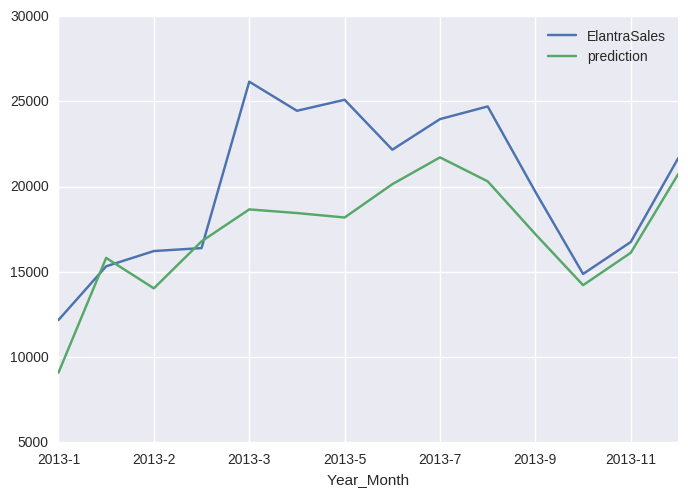

In [30]:
df_test['prediction']=result.predict(df_test[features])
df_test['Year_Month']=df_test.apply(lambda x : str(x.Year)+'-'+str(x.Month),axis=1)
df_test.set_index('Year_Month', inplace=True)
df_test[['ElantraSales','prediction']].plot()
df_test['SE']= np.square(df_test.ElantraSales-df_test.prediction)
print 'SSE',df_test.SE.sum()

** Problem 6.3 - Comparing to a Baseline **

0 points possible (ungraded)
What would the baseline method predict for all observations in the test
set? Remember that the baseline method we use predicts the average
outcome of all observations in the training set.

In [31]:
df_train.ElantraSales.mean()

14462.25

** Problem 6.4 - Test Set R-Squared**

0 points possible (ungraded)
What is the test set R-Squared?

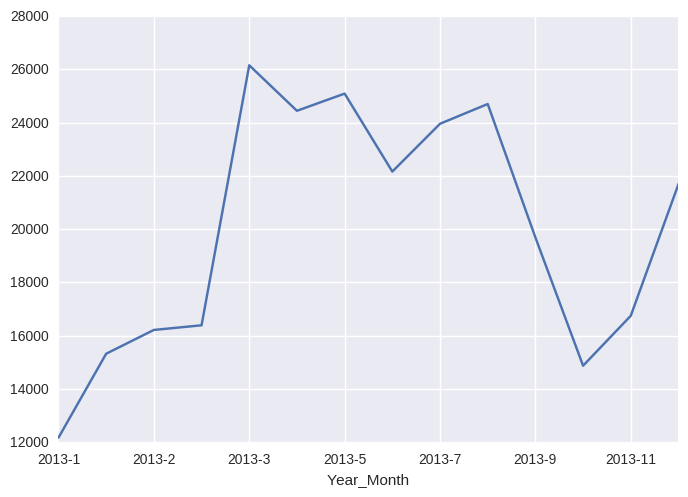

In [32]:
df_test.ElantraSales.plot()

In [35]:
R2 = 1-df_test.SE.sum()/np.sum(np.square(df_test.ElantraSales-df_train.ElantraSales.mean()))
print R2

0.728023227629


** Problem 6.5 - Absolute Errors **

0 points possible (ungraded)
What is the largest absolute error that we make in our test set
predictions?

In [34]:
print np.sqrt(df_test.SE).max()
print df_test.SE.idxmax()

7491.48769271
2013-3
